# Principal Component Analysis
1. Principal component analysis is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated
1. Followed by selecting only a subset of the new features, according to how important they are for explaining the data
1. The directions found using this process are called principal components, as they are the main directions of variance in the data

> **Used for**
> - Visualizing High Dimensional Datasets
> - Reducing Dimensionality (The dimensionality of many data sets is only artificially high)
> - Reduced Dimensionality means faster training
> - Feature Extraction

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [3]:
%matplotlib inline
sns.set()

In [4]:
digits = load_digits()

In [5]:
digits_df = pd.DataFrame(digits.data)

In [6]:
digits_df = pd.concat((digits_df, pd.Series(digits.target, name='digit')), axis = 1)
digits_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,digit
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2


In [7]:
X, y = digits_df.iloc[:, :-1], digits_df.digit

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

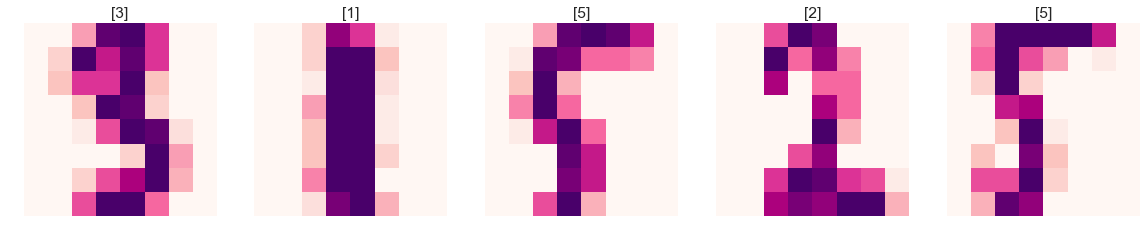

In [8]:
sns.set_context('talk')

plt.figure(figsize = (20, 4))

for i, (image, label) in enumerate(zip(X_train.iloc[:5, :].values, y_train[:5])):
    plt.subplot(1, 5, i + 1).axis('off')
    plt.imshow(image.reshape(8, 8), cmap = 'RdPu')
    plt.title('[{}]'.format(label))

plt.show()

# Support Vector Classifier

In [9]:
svc = SVC(kernel = 'rbf', C = 10, gamma = 0.1)

### Classical
SVMs are sensitive to scale of the data set, hence such low accuracy in test set

In [10]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [11]:
accuracy_score(y_train, svc.predict(X_train))

1.0

In [12]:
accuracy_score(y_test, y_pred)

0.10222222222222223

### Scaled Dataset
Scaling improves SVMs performance, but there are still lot of unnecessary dimensions

In [13]:
scaler = StandardScaler()

In [14]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
svc.fit(X_train_scaled, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
accuracy_score(y_train, svc.predict(X_train_scaled))

1.0

In [17]:
accuracy_score(y_test, svc.predict(X_test_scaled))

0.93111111111111111

### Principal Component Analysis

In [18]:
pca = PCA(0.70)

In [19]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

pca.components_.shape    # Dimensions reduced from 64 => 14

(15, 64)

#### Explained Variance Ratio
Reduced number of components means information gets thrown away, but by how much?

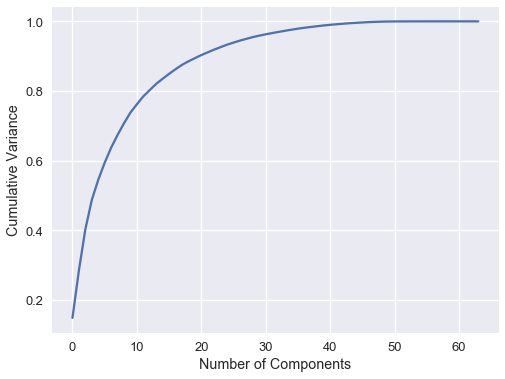

In [20]:
sns.set_context('talk')
plt.figure(figsize=(8, 6))

pca_plt = PCA().fit(X)
plt.plot(np.cumsum(pca_plt.explained_variance_ratio_))

plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.show()

In [21]:
pca.explained_variance_ratio_.sum()    # If more than 70 then it's fine

0.71924964290071725

In [22]:
svc.fit(X_train_pca, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
accuracy_score(y_train, svc.predict(X_train_pca))

1.0

In [24]:
accuracy_score(y_test, svc.predict(X_test_pca))

0.96666666666666667

In [25]:
y_pred = svc.predict(X_test_pca)

### Mistakes

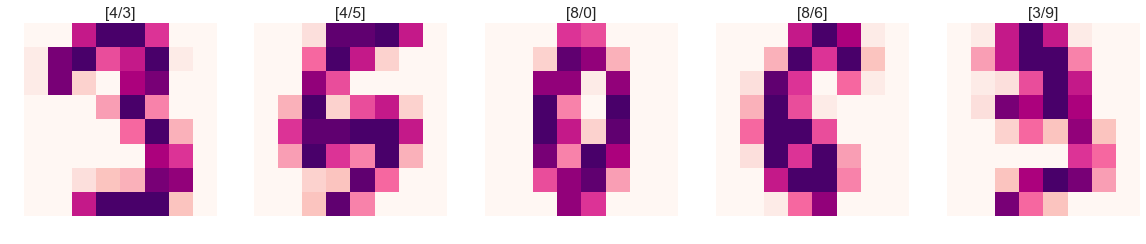

In [26]:
sns.set_context('talk')

plt.figure(figsize = (20, 8))

for i, (image, pred_label, label) in enumerate(zip(X_test[y_pred != y_test].iloc[:5, :].values,
                                                   y_pred[y_pred != y_test][:5],
                                                   y_test[y_pred != y_test][:5])):
    plt.subplot(2, 5, i + 1).axis('off')
    plt.imshow(image.reshape(8, 8), cmap = 'RdPu')
    plt.title(f'[{pred_label}/{label}]')

plt.show()

# Image Reconstruction from Compressed Representation

In [27]:
images = pca.inverse_transform(X_train_pca)

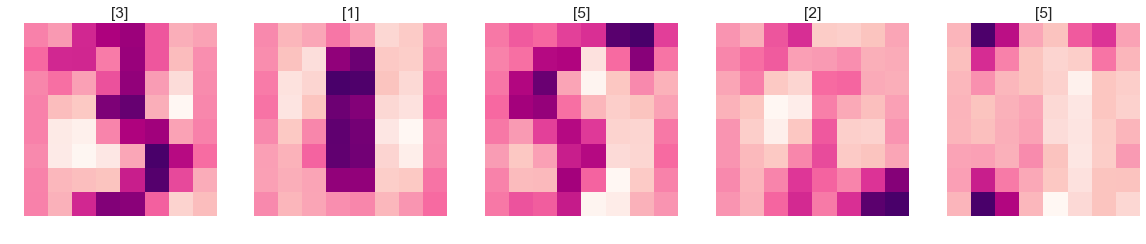

In [28]:
sns.set_context('talk')

plt.figure(figsize = (20, 4))

for i, (image, label) in enumerate(zip(images[:5], y_train[:5])):
    plt.subplot(1, 5, i + 1).axis('off')
    plt.imshow(image.reshape(8, 8), cmap = 'RdPu')
    plt.title('[{}]'.format(label))

plt.show()

# MNIST Data Set

In [29]:
mnist_df = pd.read_csv('../input/digits.csv', nrows=50)

In [30]:
X, y = mnist_df.iloc[:, 1:], mnist_df.label

In [31]:
from ipywidgets import interact, IntSlider

In [32]:
o_images, o_labels = X[:5], y[:5]

def plot_digits(n_comp):
    plt.figure(figsize = (20, 4))
    
    pca = PCA(n_comp).fit(X)
    variance = pca.explained_variance_ratio_.sum()
    images = pca.inverse_transform(pca.transform(o_images))
    
    for i, (image, label) in enumerate(zip(images, o_labels)):
        plt.subplot(1, 5, i + 1).axis('off')
        plt.imshow(image.reshape(28, 28), cmap = 'RdPu')
        plt.title(f'[{label}]')
        
    plt.suptitle(f'n = {n_comp}, variance = {variance:.2f}', size=18, y=1.1)
    
interact(plot_digits, n_comp=IntSlider(min=0, max=64, step=1, value=35))
plt.show()

A Jupyter Widget